# Business Statement

- Problem solved
    - Hypothesis: non-fraud behavior does not change across time (data has consistent spacial & temporal features)
        - Consistency score as a feature?
 
- Prediction of fraud + the reason for fraud
    - Traditional models (interpretability) vs black-box models

- Current Challenges


# EDA (Data Understanding):

In [50]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
import statsmodels.api as sm

AttributeError: module 'numpy' has no attribute 'MachAr'

In [43]:
cc_fraud = pd.read_csv('/Users\hacampbell\Desktop\Flatiron\AI Class\creditcard.csv')
cc_fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [44]:
baf_base = pd.read_csv('/Users\hacampbell\Desktop\Flatiron\AI Class\Base.csv')
baf_base.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,AA,769,...,0,500,0,INTERNET,3.888115,windows,0,1,0,7
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,AB,366,...,0,1500,0,INTERNET,31.798819,windows,0,1,0,7
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,AC,870,...,0,200,0,INTERNET,4.728705,other,0,1,0,7
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,AB,810,...,1,200,0,INTERNET,2.047904,linux,0,1,0,7
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,AB,890,...,0,1500,0,INTERNET,3.775225,macintosh,1,1,0,7


In [45]:
baf_base['fraud_bool'].value_counts()

0    988971
1     11029
Name: fraud_bool, dtype: int64

In [46]:
baf_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

- Current Datasets: Kaggle CC Fraud + Bank Account Fraud
- Distributions, trends, outliers
- Look at Normal (0) vs Fraud (1) class imbalance

# Data Processing

- Nulls
- Apply filters to realize our assumptions
- Standardize variables
- SMOTE to balance target
- Train/Test split


In [47]:
# Look for features with stronger correlations
baf_num = baf_base.select_dtypes(include=('int64', 'float64'))

# Grid Search


# Features

Types:
- Account related features: account number, card exp date, etc.
- Transaction related features: POS number, transaction time, amount, etc.
- Customer related features: customer number, type of customer, etc.

Feature transformation:
- Date/time variables: weekday or weekend
- Customer spending: average spending amount  + number of transactions
- Risk score: average number of fraud over a certain window 

# Baseline Model

- Logistic Regression 
    - Coefficients, statisitcal importance, explainability
- Decision Tree
    - Classification criteria, feature importance

In [48]:
# Creating train and test sets
cols = baf_num.columns.tolist()
cols = cols[1:]
X = baf_num[cols]
y = baf_num[['fraud_bool']]
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)


In [49]:
# Logistic Regression
log_reg = sm.Logit(ytrain, Xtrain).fit()
print(log_reg.summary())

AttributeError: module 'statsmodels' has no attribute 'Logit'

In [ ]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

# Fit the model to training data
model_log = logreg.fit(X_train, y_train)

# Predict on test set
y_hat_test = logreg.predict(X_test)

In [ ]:
# Import roc_curve, auc
from sklearn.metrics import roc_curve, auc

# Calculate the probability scores of each point in the training set
y_train_score = model_log.decision_function(X_train)

# Calculate the fpr, tpr, and thresholds for the training set
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_score)

# Calculate the probability scores of each point in the test set
y_test_score = model_log.decision_function(X_test)

# Calculate the fpr, tpr, and thresholds for the test set
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)

In [29]:
# Train a DT classifier
classifier = DecisionTreeClassifier(random_state=10)  
classifier.fit(X_train, y_train) 

DecisionTreeClassifier(random_state=10)

In [30]:
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                       random_state=10, splitter='best')

DecisionTreeClassifier(random_state=10)

In [31]:
# Make predictions for test data
y_pred = classifier.predict(X_test)  

# Evaluation

- Metrics: ROC (AUC Score), Recall, Confusion Matrix

In [32]:
# Calculate accuracy 
acc = accuracy_score(y_test,y_pred) * 100
print('Accuracy is :{0}'.format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

Accuracy is :97.66850000000001

AUC is :0.53


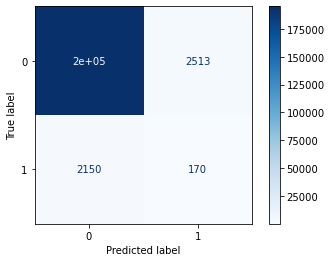

In [33]:
# confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=classifier.classes_)
disp.plot(cmap=plt.cm.Blues)

In [34]:
# Identify the optimal tree depth for given data
max_depths = list(range(1, 33))
train_results = []
test_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=10)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

KeyboardInterrupt: 

# Hyperparameter Tuning --> Optimal Model

- Ensemble Methods:
    - Random Forest
    - Boosting

# Conclusion